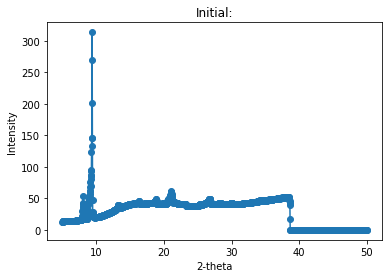

In [2]:
import pylab as plb
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

with open('A6_MAPBIBr2_darkrest30_20s.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    x=[]
    y=[]
    z=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[90]))
            line_count += 1
    plt.plot(x,y, marker='o')
    plt.title('Initial:')
    plt.xlabel('2-theta')
    plt.ylabel('Intensity')
    plt.show()
    #print(f'Processed {line_count} lines.')


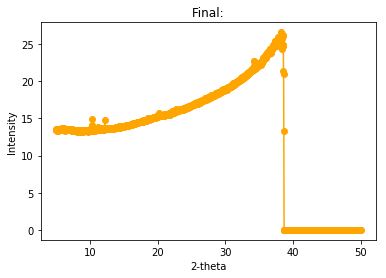

In [3]:
plt.plot(x,z, marker='o',color='orange')
plt.title('Final:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.show()
#print(f'Processed {line_count} lines.')

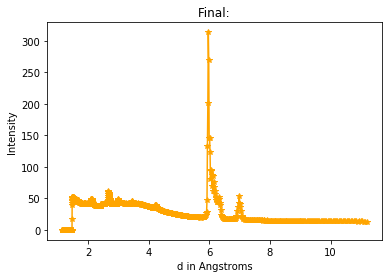

In [4]:
'''Converting the 2-theta data into a lattice spacing in Angstroms'''

result=[(9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10 for row in x]
plt.plot(result,y, marker='*',color='orange')
plt.title('Final:')
plt.xlabel('d in Angstroms')
plt.ylabel('Intensity')
plt.show()

In [5]:
'''Calculating the maximum intensity and figuring out where that maximum value is in terms of '''
maxValue=np.max(y)
# print(maxValue)
index=y.index(maxValue)
lspace=result[index]
lspace2=x[index]
print('lattice spacing=', lspace, 'Angstroms')
print(lspace2)

lattice spacing= 5.965748317893643 Angstroms
9.387


Lattice Spacing= [6.9848415727323125, 6.328378269018048, 6.280912740135287, 6.234156049169339, 6.18741010601355, 6.142034322051022, 6.066999032184288, 6.0085395065991865, 5.965748317893643, 1.503380143402175, 1.4805564285065662] in Angstroms
Intensity= [53.482, 52.662, 48.702, 50.094, 61.441, 76.069, 94.702, 146.023, 313.475, 51.954, 52.124]


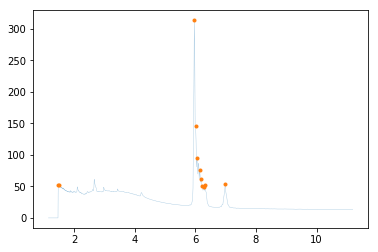

In [6]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
peaks, _= find_peaks(y,threshold=0.6)
plt.plot(result, y, lw=0.4, alpha=0.4 )
# print(peaks[3])

newY=[]
newX=[]
for i in peaks:
    newX.append(result[i])
    newY.append(y[i])
print('Lattice Spacing=', newX, 'in Angstroms')
print('Intensity=', newY)

plt.plot(newX,newY, marker="o", ls="", ms=3 )

plt.show()

In [7]:
def nums(howMany):
    indices=[]
    millInd=[]
    for l in range(howMany):
        for k in range(howMany):
            for h in range(1,howMany):
                indices.append([h,k,l])
                millInd.append(math.sqrt((h**2)+(l**2)+(k**2)))
    return(indices,millInd)

def filterPeaks(newX):
    validPeaks=[]
    for i in newX:
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05: #abs(lspace2-(i/q)) < .05:
                validPeaks.append([i,q,abs(q-(lspace/i)),nums(4)[0][counter]])
                counter+=1
            else:
                counter+=1
    return(validPeaks)

In [8]:

result=filterPeaks(newX)
#[i for i in results if i not in validpeaks]
print(result)

[[6.234156049169339, 1.0, 0.043054381244027495, [1, 0, 0]], [6.18741010601355, 1.0, 0.03582464784489947, [1, 0, 0]], [6.142034322051022, 1.0, 0.02870156611213981, [1, 0, 0]], [6.066999032184288, 1.0, 0.016688763877088064, [1, 0, 0]], [6.0085395065991865, 1.0, 0.00712172877594397, [1, 0, 0]], [5.965748317893643, 1.0, 0.0, [1, 0, 0]]]


In [9]:
def indexPeaks(newX):
    latPeaks=[]
    for i in newX:
        result=[(9.763E-11)/(2*math.sin(math.radians(i/2)))*1e10]
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05: #abs(lspace2-(i/q)) < .05:
                latPeaks.append([i,result])
                #,result[i]])
                counter+=1
        else:
            counter+=1
    return(latPeaks)
  

In [10]:
x= indexPeaks(newX)
print(x)

[[6.234156049169339, [8.977233164962552]], [6.18741010601355, [9.044989573986088]], [6.142034322051022, [9.11174693739951]], [6.066999032184288, [9.224331711940865]], [6.0085395065991865, [9.313995519616917]], [5.965748317893643, [9.380742035657661]]]


In [11]:
def nums(howMany):
    indices=[]
    millInd=[]
    for l in range(howMany):
        for k in range(howMany):
            for h in range(1,howMany):
                indices.append([h,k,l])
                millInd.append(math.sqrt((h**2)+(l**2)+(k**2)))
    return(indices,millInd)

def filterPeaks(newX):
    validPeaks=[]
    for i in newX:
        result=[(9.763E-11)/(2*math.sin(math.radians(i/2)))*1e10]# turn 2-theta data into a lattice spacing in Angstroms
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05: #abs(lspace2-(i/q)) < .05:
                validPeaks.append([i,q,abs(q-(lspace/i)),nums(4)[0][counter],result])
                counter+=1
            else:
                counter+=1
    return(validPeaks)

In [12]:
result=filterPeaks(newX)
print(result)

[[6.234156049169339, 1.0, 0.043054381244027495, [1, 0, 0], [8.977233164962552]], [6.18741010601355, 1.0, 0.03582464784489947, [1, 0, 0], [9.044989573986088]], [6.142034322051022, 1.0, 0.02870156611213981, [1, 0, 0], [9.11174693739951]], [6.066999032184288, 1.0, 0.016688763877088064, [1, 0, 0], [9.224331711940865]], [6.0085395065991865, 1.0, 0.00712172877594397, [1, 0, 0], [9.313995519616917]], [5.965748317893643, 1.0, 0.0, [1, 0, 0], [9.380742035657661]]]


ValueError: x and y must have same first dimension, but have shapes (6, 2) and (2000,)

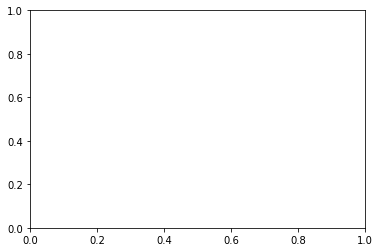

In [13]:
plt.plot(x,y)
plt.plot(x,z,color='orange')
plt.xlabel('d in Angstroms')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (30,30)

In [14]:
with open('A5_MAPBr2I_1Sun_20s.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    noheaders=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            noheaders.append(row)
    print(noheaders)

[['5.0', '12.976', '12.926', '13.011', '12.661', '12.675', '12.687', '12.686', '12.719', '12.963', '12.763', '13.033', '12.692', '12.748', '13.008', '12.58', '12.959'], ['5.02', '13.01', '13.131', '13.126', '12.803', '12.768', '12.76', '12.844', '12.781', '13.141', '12.819', '13.192', '12.824', '12.832', '13.152', '12.812', '13.016'], ['5.04', '13.124', '13.074', '13.129', '12.859', '12.752', '12.815', '12.873', '12.807', '13.115', '12.886', '13.112', '12.739', '12.882', '13.055', '12.728', '13.004'], ['5.06', '13.162', '13.106', '13.132', '12.834', '12.734', '12.819', '12.74', '12.781', '13.047', '12.857', '13.083', '12.772', '12.982', '13.211', '12.761', '13.039'], ['5.08', '13.133', '13.078', '13.114', '12.784', '12.787', '12.801', '12.86', '12.669', '12.993', '12.842', '13.085', '12.82', '12.812', '13.15', '12.737', '12.966'], ['5.1', '13.144', '13.099', '13.185', '12.913', '12.89', '12.803', '12.808', '12.825', '13.112', '12.765', '13.078', '12.941', '12.935', '13.159', '12.949', 

In [15]:
yoyo = np.array(noheaders)
yoyo = yoyo[:,0:-2]
# print(yoyo)

newNH =[]
for i in yoyo:
    subList=[]
    for n in i:
        subList.append(float(n))
    newNH.append(subList)
# print(newNH)
bitch=np.array(newNH)
print(bitch)
maxes=bitch.max(0)
print(maxes)

[[ 5.    12.976 12.926 ... 12.692 12.748 13.008]
 [ 5.02  13.01  13.131 ... 12.824 12.832 13.152]
 [ 5.04  13.124 13.074 ... 12.739 12.882 13.055]
 ...
 [49.94   0.     0.    ...  0.     0.     0.   ]
 [49.96   0.     0.    ...  0.     0.     0.   ]
 [49.98   0.     0.    ...  0.     0.     0.   ]]
[ 49.98  390.047 386.132 395.496 399.611 376.914 375.667 368.431 369.859
 373.348 373.5   379.345 377.89  374.523 373.491]


In [16]:
lame=[]
dumb=[]
for i in maxes:
    for k in newNH:
        if i in k:
            a=k.index(i)
            b=newNH
            lame.append([a,i])
            dumb.append([a,b])
        else:
            pass

In [17]:
print(lame)
# print(dumb

[[0, 49.98], [1, 390.047], [2, 386.132], [3, 395.496], [4, 399.611], [5, 376.914], [6, 375.667], [7, 368.431], [8, 369.859], [9, 373.348], [10, 373.5], [11, 379.345], [12, 377.89], [13, 374.523], [14, 373.491]]


In [14]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#estimated_data = pd.read_csv("data/estimated.csv", header=None)
#col1 = estimated_data[:][0] # First column data
#col2 = estimated_data[:][1] # Second column data

x = [0,1,2,3,4,10]
y = [0,4,2,3,5,2]

index = find_peaks(x)
print (index)
m, __ = np.polyfit(x, y, 1)#find peak in x

plt.plot(x,y,lw=0.4, alpha=0.4 )
plt.plot(x[index], marker="o", ms=3 )

plt.show()
print(m)
#plt.plot(m)



ImportError: cannot import name find_peaks

In [ ]:
result=[(9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10 for row in x]\n",
    "plt.plot(result,y, marker='*',color='orange')\n",
    "plt.title('Final:')\n",
    "plt.xlabel('d in Angstroms')\n",
    "plt.ylabel('Intensity')\n",
    "plt.show()\n"

In [ ]:
source": [
    "maxValue=np.max(y)\n",
    "index=y.index(maxValue)\n",
    "lspace=result[index]\n",
    "print('lattice spacing=', lspace, 'Angstroms')\n"

In [35]:
# import scipy; print(scipy.__version__)\n",
from scipy.signal import find_peaks
peaks, _= find_peaks(y,threshold=0.6)
plt.plot(result, y, lw=0.4, alpha=0.4)
    # print(peaks[3])
    
newY=[]
newX=[]
for i in peaks:
    newX.append(result[i])
    newY.append(y[i])
print('Lattice Spacing=', newX, 'in Angstroms')
print('Intensity=', newY)
    
plt.plot(newX,newY, marker="o", ls="", ms=3 )
    
plt.show()

NameError: name 'result' is not defined

In [ ]:
def calcMillerindex(dataset):\n",
    "    h=1\n",
    "    k=0\n",
    "    l=0\n",
    "    millIndex=[]\n",
    "    for i in newX:\n",
    "        g= np.sqrt((h^2)+(k^2)+(l^2))\n",
    "        if (maxValue-(i/g)) < .1:\n",
    "            millIndex.append('Miller Index= <', h,k,l,'>')\n",
    "        else:\n",
    "            h+=1\n",
    "return(millIndex)\n"

In [10]:
data = mean
avg = np.mean(data)
std = np.std(data)

NameError: name 'mean' is not defined

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

milk_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv')
time_series = milk_data['Monthly milk production (pounds per cow)']

indices = find_peaks(time_series)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>

In [36]:
A = [6, 7, 8, 9, 10, 11, 12]
>>> subset_of_A = set([6, 9, 12])
>>> [i for i in A if i not in subset_of_A]

[7, 8, 10, 11]

In [34]:
import pandas as pd
import peakutils
import matplotlib.pyplot as plt

x = [0,1,2,3]
y = [0,4,2,3]
index = peakutils.indexes(y, thres=0.4, min_dist=1000)

plt.plot(x,y, lw=0.4, alpha=0.4 )
plt.plot(col1[index],col2[index], marker="o", ls="", ms=3 )

plt.show()

ModuleNotFoundError: No module named 'peakutils'

In [38]:
A = [6, 7, 8, 9, 10, 11, 12]
>>> subset_of_A = set([6, 9, 12])
filter(lambda x: x not in subset_of_A, A)


SyntaxError: invalid syntax (<ipython-input-40-21fec2b8309d>, line 1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


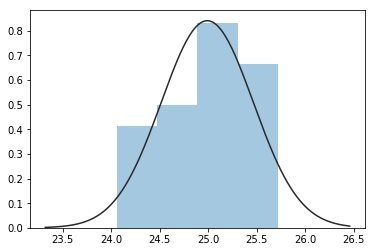

In [4]:
import seaborn as sns
from scipy import stats

sns.distplot(data, fit=stats.norm, kde=False)

# New 10/25

In [5]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,5,12.906,13.112,12.905,13.263,13.16,12.946,12.803,12.996,12.869,...,12.97,12.818,13.03,12.948,13.045,12.885,12.78,12.883,Unnamed: 31,Unnamed: 32
0,5.022,12.853,13.214,12.985,13.345,13.140,12.892,12.931,13.166,12.947,...,13.130,12.828,13.117,12.980,13.142,12.891,12.968,12.936,NaN,NaN
1,5.045,12.990,13.304,13.001,13.315,13.215,12.932,12.972,13.180,13.078,...,13.162,12.800,13.104,13.137,13.216,12.890,12.933,13.048,NaN,NaN
2,5.067,12.891,13.190,12.942,13.311,13.125,12.912,12.900,13.149,12.939,...,13.175,12.800,13.092,13.185,13.161,12.902,12.886,13.122,NaN,NaN
3,5.090,13.058,13.300,13.018,13.284,13.268,12.914,12.934,13.316,13.024,...,13.261,12.974,13.118,13.142,13.137,12.789,12.898,13.069,NaN,NaN
4,5.112,13.036,13.255,13.090,13.140,13.328,13.001,13.023,13.199,13.053,...,13.190,12.852,13.192,13.178,13.097,12.953,13.090,13.031,NaN,NaN


<IPython.core.display.Javascript object>


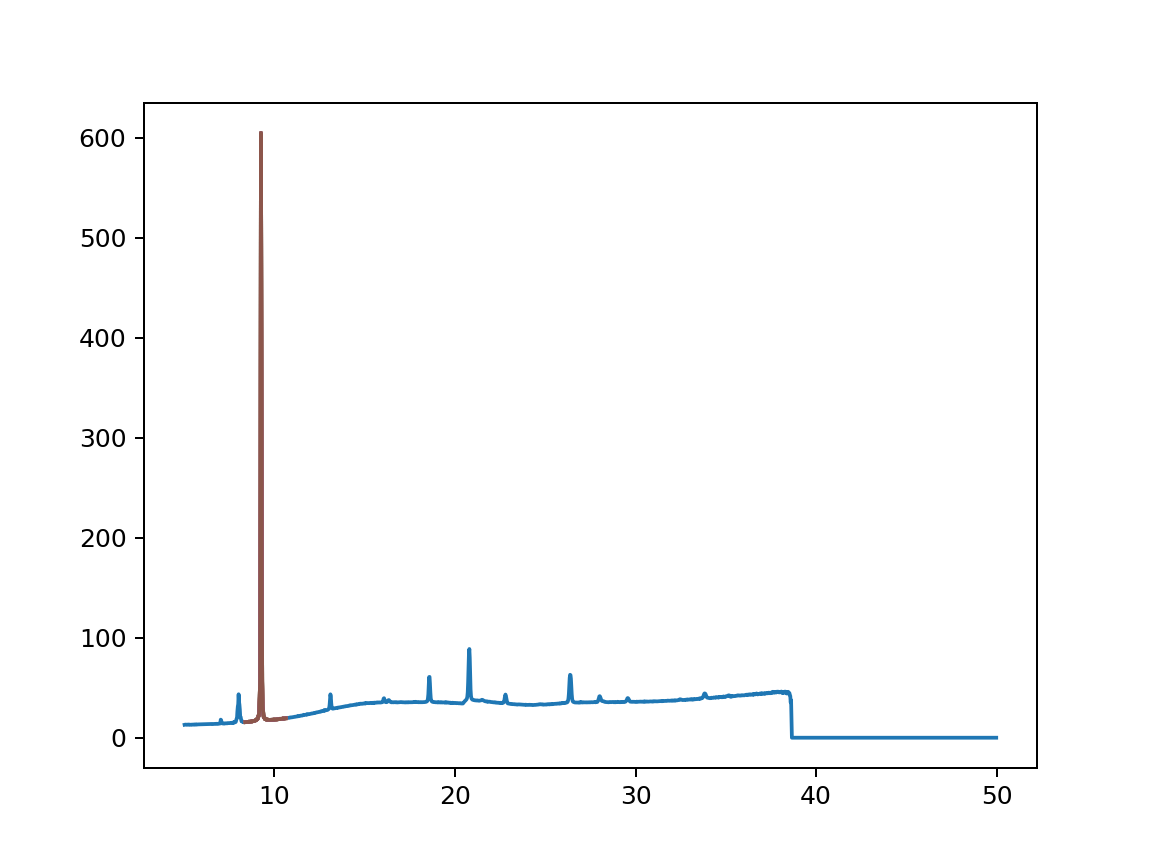

In [6]:
import matplotlib.pyplot as plt

%matplotlib notebook
plt.plot(data['5'],data['12.883'])
plt.show()


<IPython.core.display.Javascript object>


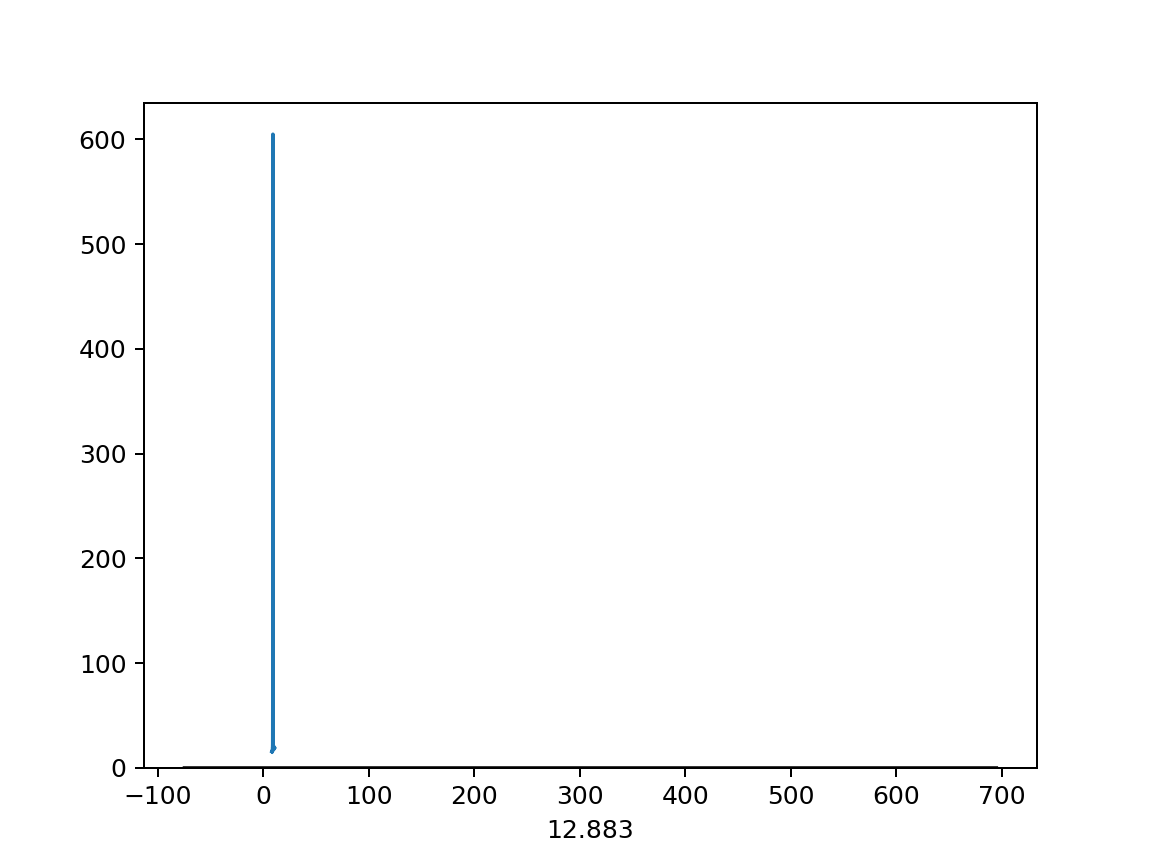

In [25]:
dataX = data['5']
dataY = data['12.883']

dataX[150]
dataX[250]
peakXData = dataX[150:250]
peakYData = dataY[150:250]

plt.figure(2) # Here's the part I need
plt.plot(peakXData,peakYData)

### Ways to identify peaks:
- take first and second derivative of the data 
- manually identify where peaks would be (narrower ranges of data) and fit Gaussian to those

### Ways to eliminate background noise:
- fit a horizontal line between start and end
- subtract off so that data aligns with flat start and end

- generally: will be moving to more convoluted data
- index data and apply to new stuff
- fitting and plotting data similar/consistent w what is in literature and matches what anna pulls

https://chrisostrouchov.com/post/peak_fit_xrd_python/

<IPython.core.display.Javascript object>


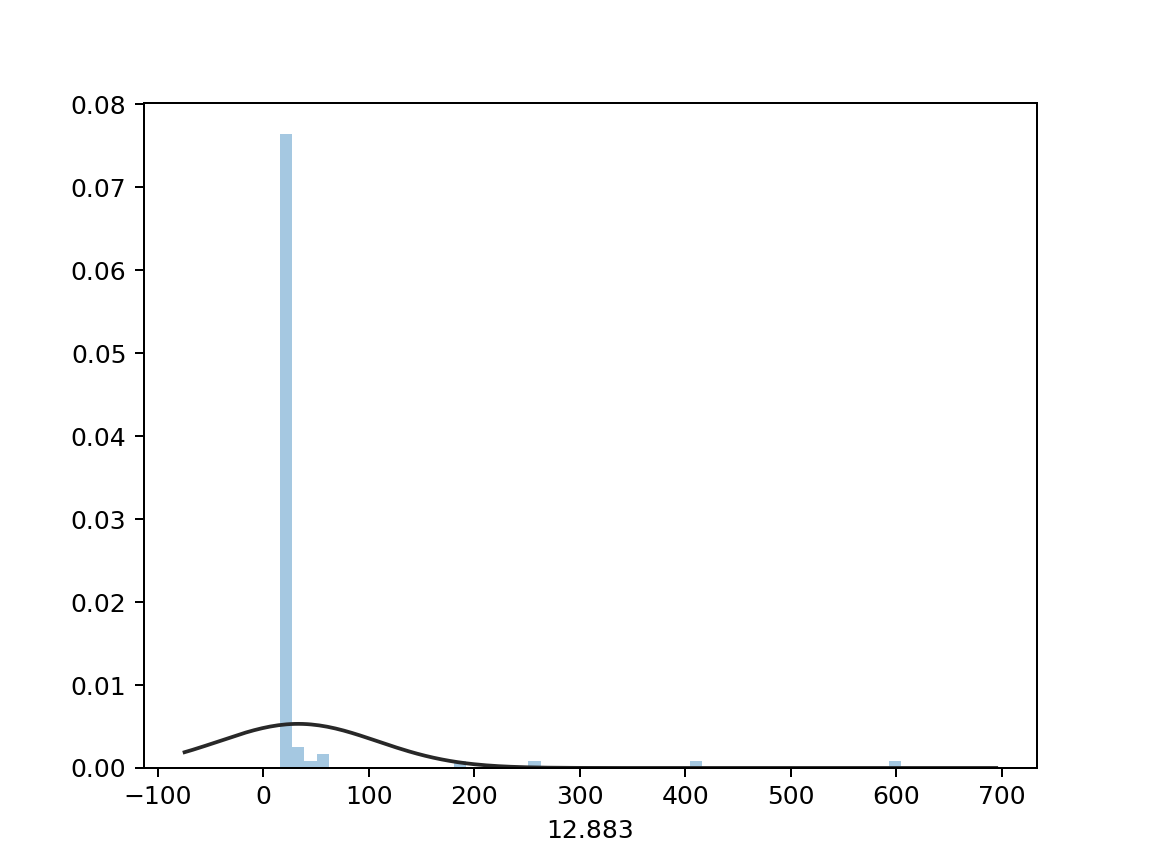

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [30]:
dataPeak1 = [peakXData,peakYData]
dataPeak1
plt.figure(3)
sns.distplot(peakYData, fit=stats.norm, kde=False)

In [7]:
import math

def g(x, A, m, s):
    return (A / (s * math.sqrt(2 * math.pi)) * np.exp(-(x-m)**2 / (2*s**2)))

peakYData=

datalist = []
for i in range(150,250):
    datalist.append(g(peakYData[i],1, np.mean(peakYData), np.std(peakYData)))
plt.figure(4)
plt.plot(peakXData,datalist)

print(peakXData)
print(datalist)

NameError: name 'peakYData' is not defined